# Conducción de calor en 2D: <font color=green>Caso estacionario</font>

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

*   Autores: 
    - Luis M. de la Cruz Salas
*   Rev: mié 12 may 2021 16:13:28 CDT

<img src="./Figuras/conceptualCOMPLETO.png" style="width: 300px;"/>

<div>
 <img src="./Figuras/condCalor2D.png"  hspace="5" vspace="5" style="float: right; width:150px"/>
    Estudiar la conducción de calor en una placa en dos dimensiones, como la que se muestra en la figura. La lontitud vertical de la placa es el doble que la longitud horizontal: $Ly = 2Lx$.
    Las condiciones de frontera son de tipo Dirichlet, es decir, la temperatura está dada en las paredes de la placa.
    En la figura se distingue $T_L, T_R, T_T$ y $T_B$ que corresponden a las temperaturas dadas en las paredes izquierda (LEFT), derecha (RIGHT), arriba (TOP) y abajo (BOTTOM), respectivamente. En este ejemplo tenemos los siguiente valores:
    
$$ 
T_L = 0, \qquad T_R = 0, \qquad T_B = 0, \qquad T_T = 1 
$$

La conductividad $\kappa$ se considera constante y no hay dependencia temporal.
</div>

<img src="./Figuras/matematicoCOMPLETO.png" style="width: 300px;"/>

El modelo matemático de este problema consiste de la siguiente ecuación diferencial parcial:

$$
\dfrac{\partial}{\partial x} \left(\kappa \dfrac{\partial T}{\partial x}\right) + \dfrac{\partial}{\partial y} \left(\kappa \dfrac{\partial T}{\partial y}\right) = 0
$$

<img src="./Figuras/numericoCOMPLETO.png" style="width: 300px;"/>

En este ejemplo haremos la solución de manera implícita y con el método de volumen finito (FVM, por sus siglas en inglés).


<img src="./Figuras/computacionalCOMPLETO.png" style="width: 450px;"/>

In [1]:
#-----------------------------------------------------------
# Ruta absoluta de PyNoxtli
#
#import os, sys
#sys.path.insert(0, os.path.abspath('../../base'))
#-----------------------------------------------------------
#
# Módulos de numpy
#
import numpy as np
#
# Módulos necesarios de PyNoxtli
#
from macti.PyNoxtli.geo.rectangle import Rectangle
from macti.PyNoxtli.fvm.sDiffusion import sDiffusion2D
from macti.PyNoxtli.fvm.pde import PDE
from macti.PyNoxtli.utils.displayInfo import printInfo
#import macti.PyNoxtli.vis.flowix as flx
import macti.visual as mvis
# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
import matplotlib.pyplot as plt
# Parámetros para el estilo de las gráficas
#params = {
#          'text.usetex'    : True,
#          'font.family': 'DejaVu Serif',
#         }
#plt.rcParams.update(params)

In [15]:
#
# Propiedades físicas y geométricas del dominio
#
Lx = 1.0 # meters
Ly = 2.0
TL = 0 # °C 
TR = 0 # °C
TB = 0 # °C
TT = 1 # °C
k  = 1 # W/m.K
Nx = 5 # Número de nodos
Ny = 9

In [16]:
#
# Definición del dominio y condiciones de frontera
placa = Rectangle(Lx, Ly)
placa.boundaryConditions(dirichlet = {'LEFT':TL, 'RIGHT':TR, 'BOTTOM':TB, 'TOP':TT})
#
# Creación de la malla
#
malla     = placa.constructMesh(Nx, Ny) # Se construye la malla del dominio
ivx, ivy, _ = malla.bounds(bi = 1, ei = Nx-1,
                           bj = 1, ej = Ny-1) # Grados de libertad
nx  = malla.nx    # Número de nodos
ny  = malla.ny    # Número de nodos
nvx = malla.vx    # Número de volúmenes
nvy = malla.vy    # Número de volúmenes
dx  = malla.dx    # Tamaño de los volúmenes
dy  = malla.dy    # Tamaño de los volúmenes
#
# Arreglo para almacenar la solución
T = np.zeros((nvy+2, nvx+2)) # El arreglo contiene ceros
T[-1,:] = TT      # Condición de frontera pared superior
T[0,:] = TB      # Condición de frontera pared inferior
T[:,0] = TL      # Condición de frontera pared izquierda
T[:,-1] = TR      # Condición de frontera pared derecha

In [17]:
#
# Impresión de los datos del problema
#
printInfo(Longitud_x = Lx,
          Longitud_y = Ly,
          TL_TR_TT_TB = (TL, TR, TT, TB),
          Conductividad = k,
          Nodos = (nx,ny),
          Volúmenes = (nvx,nvy),
          Deltas = (dx,dy),
          Inner = (ivx, ivy))

.--------------------------------------------------------------------------------.
|              PyNoxtli : Ver. 1.0, LMCS-2021, [GNU GPL License V3]              |
.--------------------------------------------------------------------------------.
|     Longitud_x = 1.000000000000000e+00                                         |
|     Longitud_y = 2.000000000000000e+00                                         |
|    TL_TR_TT_TB = (0, 0, 1, 0)                                                  |
|  Conductividad =     1                                                         |
|          Nodos =   (5, 9)                                                      |
|      Volúmenes =   (4, 8)                                                      |
|         Deltas = (0.25, 0.25)                                                  |
|          Inner =   (4, 8)                                                      |
.--------------------------------------------------------------------------------.


In [18]:
#
# Definición de la fuente 
#
Su = np.zeros((ivy, ivx)) # Por ahora no hay fuente
#
# Definición del esquema de disccretización
#
dif_scheme = sDiffusion2D(malla, Su, Gamma = k)
#
# Definición de la ecuación a resolver
#
laplace = PDE(placa, T)
#
# Creación del sistema lineal y su solución
#
Su.shape = ivy * ivx
laplace.setNumericalScheme(dif_scheme)
sol = laplace.solve()
print('Solución:\n{}'.format(T))

Solución:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.02771798e-04 2.17596863e-03 2.17596863e-03
  9.02771798e-04 0.00000000e+00]
 [0.00000000e+00 3.24058335e-03 7.80100122e-03 7.80100122e-03
  3.24058335e-03 0.00000000e+00]
 [0.00000000e+00 7.49895651e-03 1.79866590e-02 1.79866590e-02
  7.49895651e-03 0.00000000e+00]
 [0.00000000e+00 1.62669037e-02 3.86602042e-02 3.86602042e-02
  1.62669037e-02 0.00000000e+00]
 [0.00000000e+00 3.51744491e-02 8.17274046e-02 8.17274046e-02
  3.51744491e-02 0.00000000e+00]
 [0.00000000e+00 7.78771022e-02 1.71348016e-01 1.71348016e-01
  7.78771022e-02 0.00000000e+00]
 [0.00000000e+00 1.82862437e-01 3.54439675e-01 3.54439675e-01
  1.82862437e-01 0.00000000e+00]
 [0.00000000e+00 4.81995197e-01 7.09108709e-01 7.09108709e-01
  4.81995197e-01 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00]]


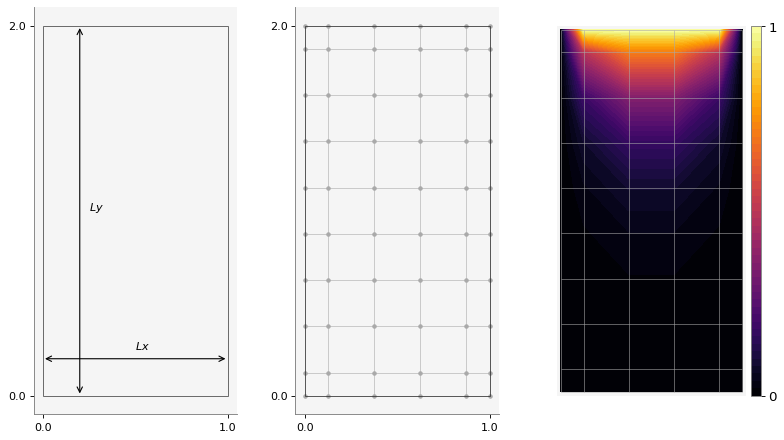

In [33]:
x, y, _ = malla.coordinatesMeshFVM()
# Generación de una rejilla
xg, yg = np.meshgrid(x, y, indexing='ij')

vis = mvis.Plotter(1,3,[dict(aspect='equal'), dict(aspect='equal'), dict(aspect='equal')],
                  dict(figsize=(10,8)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(2, xg, yg, nodeson=True)
vis.plot_frame(2, xg, yg)

cax3 = vis.set_canvas(3,Lx,Ly)
c = vis.contourf(3, xg, yg, T.T, levels=50, cmap='inferno')
vis.fig.colorbar(c, cax=cax3, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.plot_mesh2D(3, xg, yg)

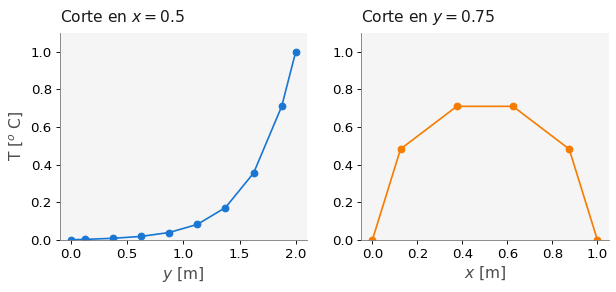

In [26]:
#
# Graficación de Temperatura vs posición
#
par2 = [{'title':'Corte en $x=0.5$', 'xlabel':'$y$ [m]', 'ylabel':'T [$^o$ C]', 'ylim':(0,1.1)},
        {'title':'Corte en $y=0.75$', 'xlabel':'$x$ [m]', 'ylim':(0,1.1)}]   
v2 = mvis.Plotter(1, 2, par2,{'figsize':(8,4)})
v2.plot(1, y, T[:,2], ls='-', marker = 'o', c = 'C0')
v2.plot(2, x, T[-2,:], ls = '-',marker = 'o', c = 'C1')
v2.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt

from macti.PyNoxtli.geo.rectangle import Rectangle
from macti.PyNoxtli.fvm.sDiffusion import sDiffusion2D
from macti.PyNoxtli.fvm.pde import PDE
from macti.PyNoxtli.utils.displayInfo import printInfo
import macti.visual as mvis

In [35]:
def diffusion2D(Lx, Ly, Nx, Ny, TL, TR, TB, TT, k):
    #
    # Definición del dominio y condiciones de frontera
    placa = Rectangle(Lx, Ly)
    placa.boundaryConditions(dirichlet = {'LEFT':TL, 'RIGHT':TR, 'BOTTOM':TB, 'TOP':TT})
    #
    # Creación de la malla
    #
    malla     = placa.constructMesh(Nx, Ny) # Se construye la malla del dominio
    ivx, ivy, _ = malla.bounds(bi = 1, ei = Nx-1,
                               bj = 1, ej = Ny-1) # Grados de libertad
    nx  = malla.nx    # Número de nodos
    ny  = malla.ny    # Número de nodos
    nvx = malla.vx    # Número de volúmenes
    nvy = malla.vy    # Número de volúmenes
    dx  = malla.dx    # Tamaño de los volúmenes
    dy  = malla.dy    # Tamaño de los volúmenes
    #
    # Arreglo para almacenar la solución
    T = np.zeros((nvy+2, nvx+2)) # El arreglo contiene ceros
    T[-1,:] = TT      # Condición de frontera pared superior
    T[0,:] = TB      # Condición de frontera pared inferior
    T[:,0] = TL      # Condición de frontera pared izquierda
    T[:,-1] = TR      # Condición de frontera pared derecha
    #
    # Definición de la fuente 
    #
    Su = np.zeros((ivy, ivx)) # Por ahora no hay fuente
    #
    # Definición del esquema de disccretización
    #
    dif_scheme = sDiffusion2D(malla, Su, Gamma = k)
    #
    # Definición de la ecuación a resolver
    #
    laplace = PDE(placa, T)
    #
    # Creación del sistema lineal y su solución
    #
    Su.shape = ivy * ivx
    laplace.setNumericalScheme(dif_scheme)
    sol = laplace.solve()

    x, y, _ = malla.coordinatesMeshFVM()
    # Generación de una rejilla
    xg, yg = np.meshgrid(x, y, indexing='ij')
    
    vis = mvis.Plotter(1,3,[dict(aspect='equal'), dict(aspect='equal'), dict(aspect='equal')],
                      dict(figsize=(10,8)))
    
    vis.draw_domain(1, xg, yg)
    vis.plot_mesh2D(2, xg, yg, nodeson=True)
    vis.plot_frame(2, xg, yg)
    
    cax3 = vis.set_canvas(3,Lx,Ly)
    c = vis.contourf(3, xg, yg, T.T, levels=50, cmap='inferno')
    vis.fig.colorbar(c, cax=cax3, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
    vis.plot_mesh2D(3, xg, yg)
    vis.show()

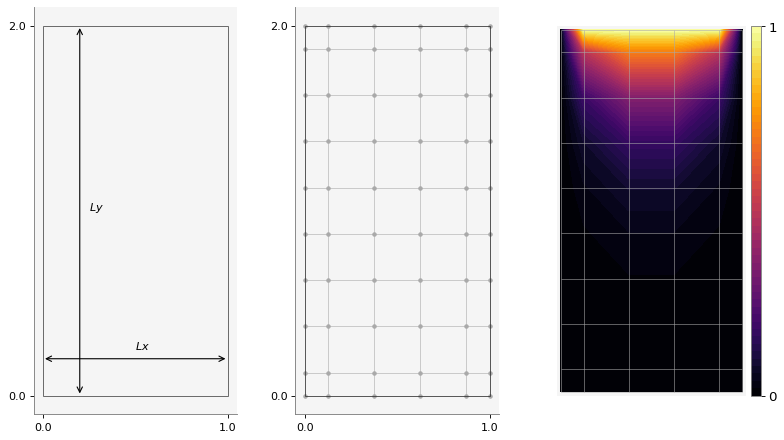

In [36]:
Lx = 1.0 # meters
Ly = 2.0
TL = 0 # °C 
TR = 0 # °C
TB = 0 # °C
TT = 1 # °C
k  = 1 # W/m.K
Nx = 5 # Número de nodos
Ny = 9

diffusion2D(Lx, Ly, Nx, Ny, TL, TR, TB, TT, k)

In [39]:
import ipywidgets as wd

wd.interact(diffusion2D,
            Lx = (1.0,3.0,0.5), Ly = (1.0,3.0,0.5), Nx = (5,10,1), Ny = (9,20,1),
            TL = (0.0,1.0,0.5), TR = (0.0,1.0,0.5), TB = (0.0,1.0,0.5), TT = (0.0,1.0,0.5),
            k = wd.fixed(1))

interactive(children=(FloatSlider(value=2.0, description='Lx', max=3.0, min=1.0, step=0.5), FloatSlider(value=…

<function __main__.diffusion2D(Lx, Ly, Nx, Ny, TL, TR, TB, TT, k)>